In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
###read in dataframe##
train_users_2 = pd.read_csv("C:/Users/Keira/Documents/msc analytics/Final project/train_users_2.csv")
test_users= pd.read_csv("C:/Users/Keira/Documents/msc analytics/Final project/test_users.csv")
sessions = pd.read_csv("C:/Users/Keira/Documents/msc analytics/Final project/sessions.csv")
countries = pd.read_csv("C:/Users/Keira/Documents/msc analytics/Final project/countries.csv")
age_gender_bkts = pd.read_csv("C:/Users/Keira/Documents/msc analytics/Final project/age_gender_bkts.csv")


# The part is on exploratory for age and gender data frame

In [3]:
###The dimensions of the countries data frame###
print(age_gender_bkts.shape)
###Data fields captured in countries data frame##
print(age_gender_bkts.columns)

(420, 5)
Index(['age_bucket', 'country_destination', 'gender',
       'population_in_thousands', 'year'],
      dtype='object')


In [4]:
###Have a look at the data##
age_gender_bkts

###These are census data. E.g. meaning that in Aus, there are 1000 male who are 100+ years old in 2015.##

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [5]:
###Retrieve only US dataset as as all the users in training dataset are from the USA###
US_census = age_gender_bkts.loc[age_gender_bkts['country_destination'] == 'US']
print(US_census)

print(US_census.year.unique())

    age_bucket country_destination  gender  population_in_thousands    year
378      90-94                  US  female                   1193.0  2015.0
379      75-79                  US    male                   3641.0  2015.0
380      70-74                  US    male                   5278.0  2015.0
381      65-69                  US    male                   7561.0  2015.0
382      60-64                  US    male                   9217.0  2015.0
383      55-59                  US    male                  10689.0  2015.0
384      50-54                  US    male                  11013.0  2015.0
385      45-49                  US    male                  10454.0  2015.0
386      40-44                  US    male                  10159.0  2015.0
387      10-14                  US  female                  10346.0  2015.0
388      35-39                  US    male                  10329.0  2015.0
389      30-34                  US    male                  10984.0  2015.0
390      25-

C:\Users\Keira\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


165053.0
160079.0
0.49235079906007406
0.5076492009399259


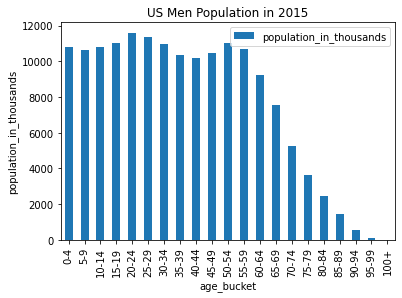

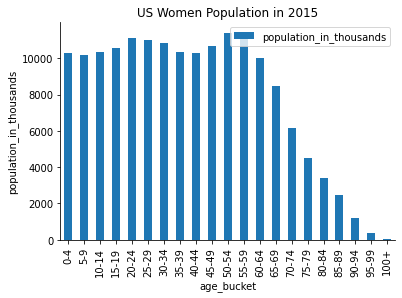

In [6]:
####To see the population for male and female####

women = US_census.loc[US_census['gender'] == 'female']
women.drop(['year'], axis=1, inplace=True)
Total_women=women['population_in_thousands'].sum()
print(Total_women)

men = US_census.loc[US_census['gender'] == 'male']
men.drop(['year'], axis=1, inplace=True)
Total_men=men['population_in_thousands'].sum()
print(Total_men)

Proportion_men=Total_men/(Total_women+Total_men)
print(Proportion_men)

Proportion_women=1-Proportion_men
print(Proportion_women)


field = "age_bucket"
age_order = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44","45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85-89", "90-94", "95-99", "100+"]
ax_men = men.set_index("age_bucket").loc[age_order].plot(kind="bar", title="US Men Population in 2015")
ax_women = women.set_index("age_bucket").loc[age_order].plot(kind="bar", title="US Women Population in 2015")
ax_men.set_ylabel("population_in_thousands")
ax_women.set_ylabel("population_in_thousands")

sns.despine()
plt.show()


Observation:
The proportion of male to female in US is about half each. Majority of the age range is between 0-64. The age range is too wide and may be more useful to estimate age based on training data.

# This part is the data exploratory of training data set

In [7]:
####TRAINING DATA######
###The dimensions of the training data frame###
print(train_users_2.shape)
###Data fields captured in training data frame##
print(train_users_2.columns)

(213451, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [8]:
###Have a look at the data##

train_users_2.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


## Handle missing values and data transformation

In [9]:
#################DEAL WITH MISSING DATA IN TRAINING DATA SET###############
##Change the unknown in gender to NA#####
train_users_2.gender.replace('-unknown-', np.nan, inplace=True)
train_users_2.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,NaN,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [10]:
###Number of missing data in the dataset###
#users.shape[0] => row count
train_users_2_nan = (train_users_2.isnull().sum() / train_users_2.shape[0]) * 100
train_users_2_nan[train_users_2_nan > 0]

####Therefore NDF is about 58% of data
###Gender NA is 44%
###Age NA is 42%


date_first_booking         58.347349
gender                     44.829024
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

In [11]:
###Get descriptive data for age####
train_users_2['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [12]:
###Need to sieve out wrong age data####Not likely that the users are over 122 yo and below 18 yo
print(sum(train_users_2.age > 122))
print(sum(train_users_2.age < 18))

781
158


In [13]:
###Therefore to set those over 122 and below 18 to NA###
train_users_2.loc[train_users_2.age > 122, 'age'] = np.nan
train_users_2.loc[train_users_2.age < 18, 'age'] = np.nan

# To use the gender demographics to try to populate the training and test data frame NA gender values

In [14]:
####Random put female and male based on proportion in US demographics###
s=US_census['gender'].value_counts(normalize=True, dropna=False)       
missing = train_users_2['gender'].isnull()
train_users_2.loc[missing,'gender'] = np.random.choice(s.index, size=len(train_users_2[missing]),p=s.values)


train_users_2.gender.replace('female', 'FEMALE', inplace=True)
train_users_2.gender.replace('male', 'MALE', inplace=True)

print(train_users_2)

                id date_account_created  timestamp_first_active  \
0       gxn3p5htnn           2010-06-28          20090319043255   
1       820tgsjxq7           2011-05-25          20090523174809   
2       4ft3gnwmtx           2010-09-28          20090609231247   
3       bjjt8pjhuk           2011-12-05          20091031060129   
4       87mebub9p4           2010-09-14          20091208061105   
...            ...                  ...                     ...   
213446  zxodksqpep           2014-06-30          20140630235636   
213447  mhewnxesx9           2014-06-30          20140630235719   
213448  6o3arsjbb4           2014-06-30          20140630235754   
213449  jh95kwisub           2014-06-30          20140630235822   
213450  nw9fwlyb5f           2014-06-30          20140630235824   

       date_first_booking  gender   age signup_method  signup_flow language  \
0                     NaN  FEMALE   NaN      facebook            0       en   
1                     NaN    MALE  38

In [15]:
####To do data visualisation###
###To set what are the categorical data####
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    train_users_2[categorical_feature] = train_users_2[categorical_feature].astype('category')

In [16]:
####To arrange it into date format####
train_users_2['date_account_created'] = pd.to_datetime(train_users_2['date_account_created'])
train_users_2['date_first_booking'] = pd.to_datetime(train_users_2['date_first_booking'])
train_users_2['date_first_active'] = pd.to_datetime((train_users_2.timestamp_first_active // 1000000), format='%Y%m%d')

## Data visualisation

### Gender

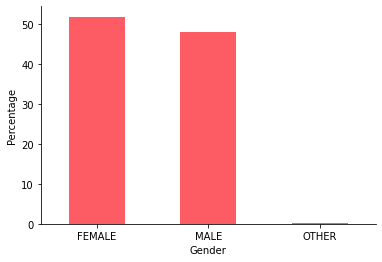

In [17]:
###Data visualisation for gender###
Users_percentage=train_users_2.gender.value_counts(dropna=False)/train_users_2.shape[0]*100
Users_percentage.plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
sns.despine()
plt.show()

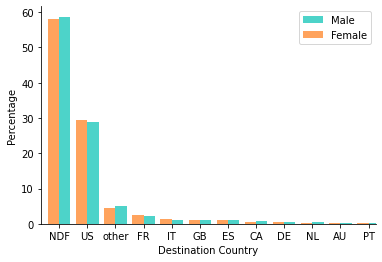

In [18]:
####To see the destination for male and female####
women = sum(train_users_2['gender'] == 'FEMALE')
men = sum(train_users_2['gender'] == 'MALE')

female_destinations = train_users_2.loc[train_users_2['gender'] == 'FEMALE', 'country_destination'].value_counts() / women * 100
male_destinations = train_users_2.loc[train_users_2['gender'] == 'MALE', 'country_destination'].value_counts() / men * 100

# Bar width
width = 0.4

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

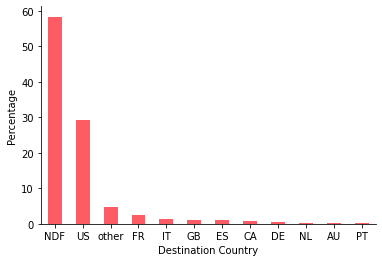

In [19]:
#####To see the relative percentage of destination country#####
Destination_country=train_users_2.country_destination.value_counts()/train_users_2.shape[0]*100
Destination_country.plot(kind='bar',color='#FD5C64', rot=0 )

plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()


#####Most people never make any booking and most of the booking destination is in US#################

### age

C:\Users\Keira\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


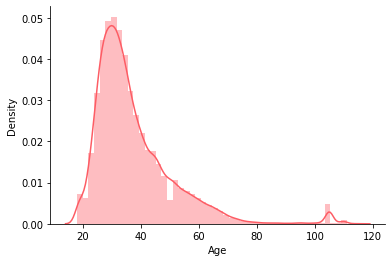

In [20]:
sns.distplot(train_users_2.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
plt.show()

#############For those who input their age (~50%), most of the people are in the age range of 20 to 40##################

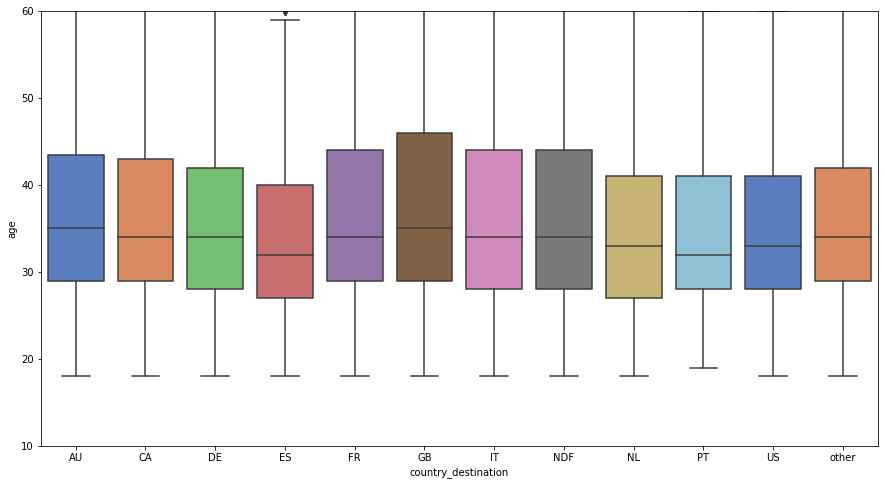

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=train_users_2, palette="muted", ax =ax)
ax.set_ylim([10, 60])
plt.show()


### Language 

In [22]:
####Percentage of users who use English###
print((sum(train_users_2.language == 'en') / train_users_2.shape[0])*100)

###About 97% uses English as their language

96.65637546790599


### Other categorical types

C:\Users\Keira\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Keira\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Keira\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
C:\Users\Keira\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
Th

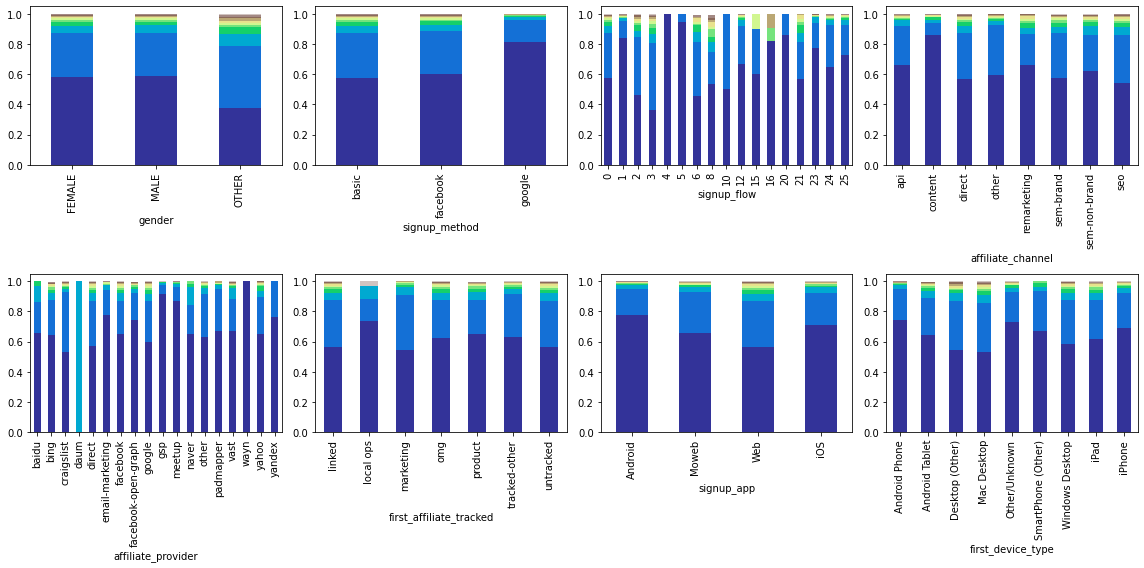

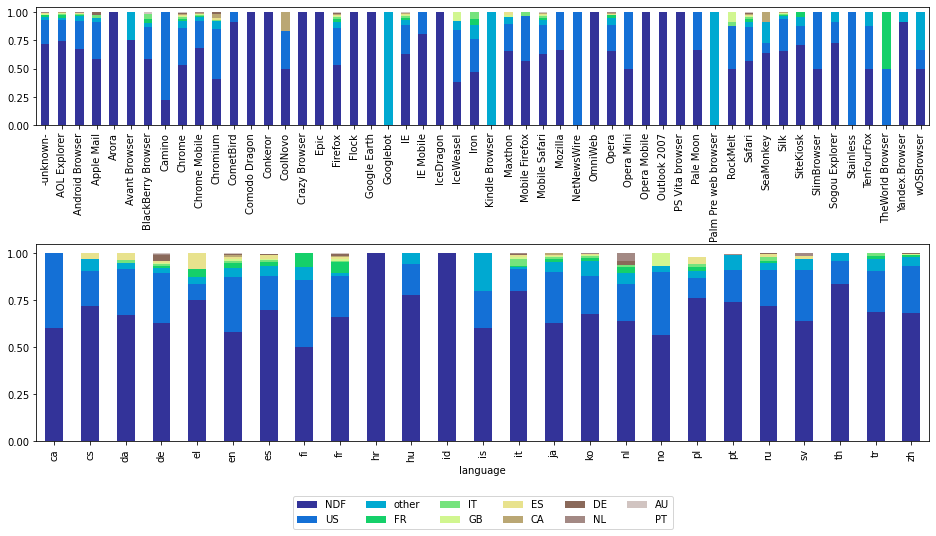

In [23]:
bar_order = ['NDF','US','other','FR','IT','GB','ES','CA','DE','NL','AU','PT']
cat_vars = ['gender', 'signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider', 
            'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'language']
from matplotlib.colors import Colormap
fig, ax4 = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
def pltCatVar(var,axis,ax_num):
    ctab = pd.crosstab([train_users_2[var]], train_users_2.country_destination).apply(lambda x: x/x.sum(), axis=1)
    ctab[bar_order].plot(kind='bar', stacked=True, ax=axis.reshape(-1)[ax_num],legend=False, 
                         colormap='terrain')
for i,var in enumerate(cat_vars[:8]):
    pltCatVar(var,ax4,i)
plt.tight_layout()
fig, ax5 = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharey=True)
for i,var in enumerate(cat_vars[8:]):
    pltCatVar(var,ax5,i)
box = ax5[0].get_position()
ax5[0].set_position([box.x0, box.y0 + box.height * 0.4, box.width, box.height * 0.6])
ax5[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)

plt.show()

### Date 

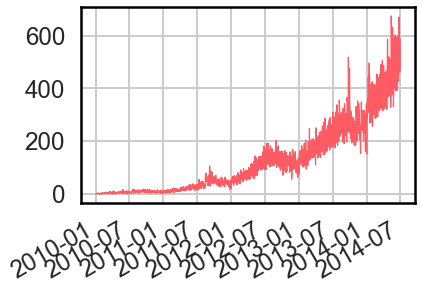

In [24]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
train_users_2.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.show()

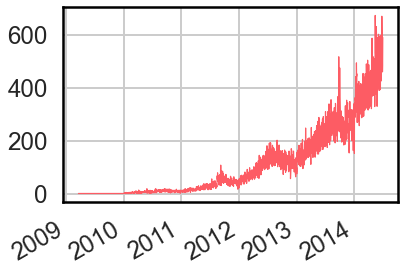

In [25]:
train_users_2.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.show()

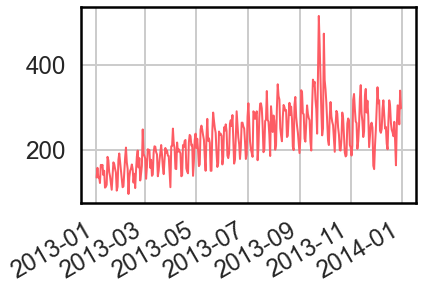

In [26]:
users_2013 = train_users_2[train_users_2['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=2, color='#FD5C64')
plt.show()

In [27]:
weekdays = []
for date in train_users_2.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

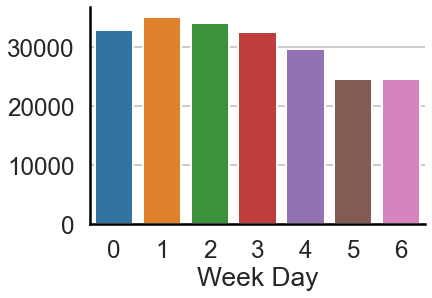

In [28]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()
plt.show()

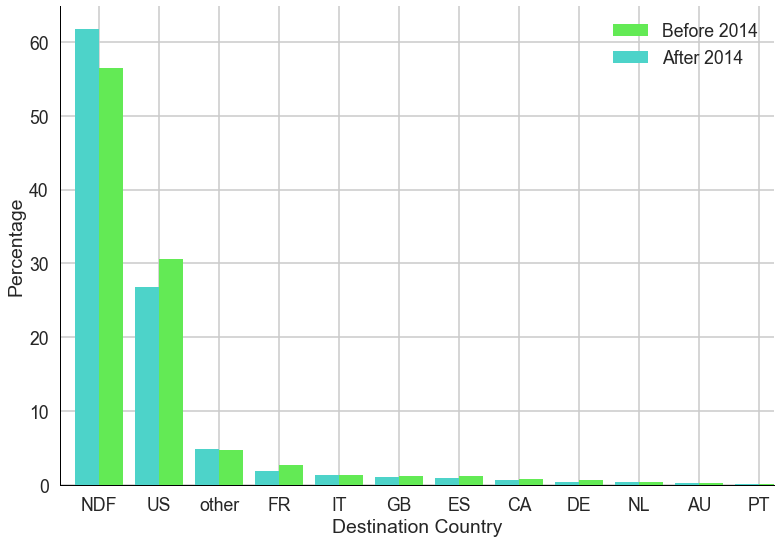

In [29]:
date = pd.to_datetime(20140101, format='%Y%m%d')

before = sum(train_users_2.loc[train_users_2['date_first_active'] < date, 'country_destination'].value_counts())
after = sum(train_users_2.loc[train_users_2['date_first_active'] > date, 'country_destination'].value_counts())
before_destinations = train_users_2.loc[train_users_2['date_first_active'] < date, 
                                'country_destination'].value_counts() / before * 100
after_destinations = train_users_2.loc[train_users_2['date_first_active'] > date, 
                               'country_destination'].value_counts() / after * 100
before_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Before 2014', rot=0)
after_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='After 2014', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

sns.despine()
plt.show()

# This is data transformation for test data set

In [29]:
######TEST DATA#################
###The dimensions of the test data frame###
print(test_users.shape)
###Data fields captured in test data frame##
print(test_users.columns)

(62096, 15)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


In [30]:
###Have a look at the data##
test_users.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


## Handle missing data and data transformation

In [31]:
#################DEAL WITH MISSING DATA IN TRAINING DATA SET###############
##Change the unknown in gender to NA#####
test_users.gender.replace('-unknown-', np.nan, inplace=True)
test_users.head(20)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,NaN,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [32]:
###Number of missing data in the dataset###
#users.shape[0] => row count
test_users_nan = (test_users.isnull().sum() / test_users.shape[0]) * 100
test_users_nan[test_users_nan > 0].drop('date_first_booking')

####Gender NA is 54%
####Age NA is about 46%


gender                     54.418964
age                        46.502190
first_affiliate_tracked     0.032208
dtype: float64

## To use the gender demographics to try to populate the  test data frame NA gender values

In [33]:
s=US_census['gender'].value_counts(normalize=True, dropna=False) 
missing2 = test_users['gender'].isnull()
test_users.loc[missing2,'gender'] = np.random.choice(s.index, size=len(test_users[missing2]),p=s.values)

test_users.gender.replace('female', 'FEMALE', inplace=True)
test_users.gender.replace('male', 'MALE', inplace=True)

print(test_users)


               id date_account_created  timestamp_first_active  \
0      5uwns89zht           2014-07-01          20140701000006   
1      jtl0dijy2j           2014-07-01          20140701000051   
2      xx0ulgorjt           2014-07-01          20140701000148   
3      6c6puo6ix0           2014-07-01          20140701000215   
4      czqhjk3yfe           2014-07-01          20140701000305   
...           ...                  ...                     ...   
62091  cv0na2lf5a           2014-09-30          20140930235232   
62092  zp8xfonng8           2014-09-30          20140930235306   
62093  fa6260ziny           2014-09-30          20140930235408   
62094  87k0fy4ugm           2014-09-30          20140930235430   
62095  9uqfg8txu3           2014-09-30          20140930235901   

       date_first_booking  gender   age signup_method  signup_flow language  \
0                     NaN  FEMALE  35.0      facebook            0       en   
1                     NaN  FEMALE   NaN         b

In [34]:
###Get descriptive data for age####
test_users['age'].describe()



count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64

In [35]:
###Need to sieve out wrong age data####Not likely that the users are over 122 yo and below 18 yo
print(sum(test_users.age > 122))
print(sum(test_users.age < 18))

49
30


In [36]:
###Therefore to set those over 122 and below 18 to NA###
test_users.loc[test_users.age > 122, 'age'] = np.nan
test_users.loc[test_users.age < 18, 'age'] = np.nan

In [37]:
###To set what are the categorical data####
categorical_features_test = [
    'affiliate_channel',
    'affiliate_provider',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature_t in categorical_features_test:
    test_users[categorical_feature_t] = test_users[categorical_feature_t].astype('category')

In [38]:
####To arrange it into date format####
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['date_first_active'] = pd.to_datetime((test_users.timestamp_first_active // 1000000), format='%Y%m%d')

## Data Visualisation

### Gender

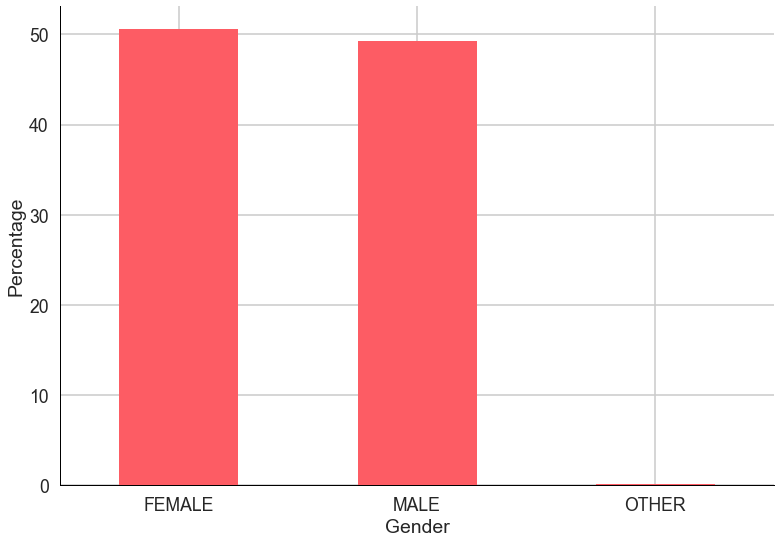

In [40]:
###Data visualisation for gender###
Users_percentage_test=test_users.gender.value_counts(dropna=False)/test_users.shape[0]*100
Users_percentage_test.plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
sns.despine()
plt.show()

####Have more NA compared to training and also % of male and female are quite close compared to training

### Age

C:\Users\Keira\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


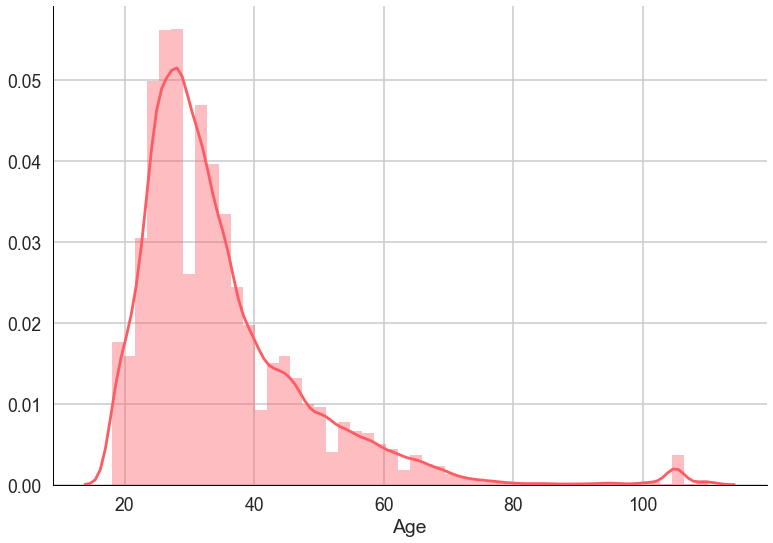

In [41]:
sns.distplot(test_users.age.dropna(), color='#FD5C64')
plt.xlabel('Age')
sns.despine()
plt.show()

#############For those who input their age (~50%), most of the people are in the age range of 20 to 40 
##################but shows a slightly younger crowd compared to training set

### Language

In [42]:
####Percentage of users who use English###
print((sum(test_users.language == 'en') / test_users.shape[0])*100)

###About 95% uses English as their language. about 20% higher than training set

95.3749033754


### Date

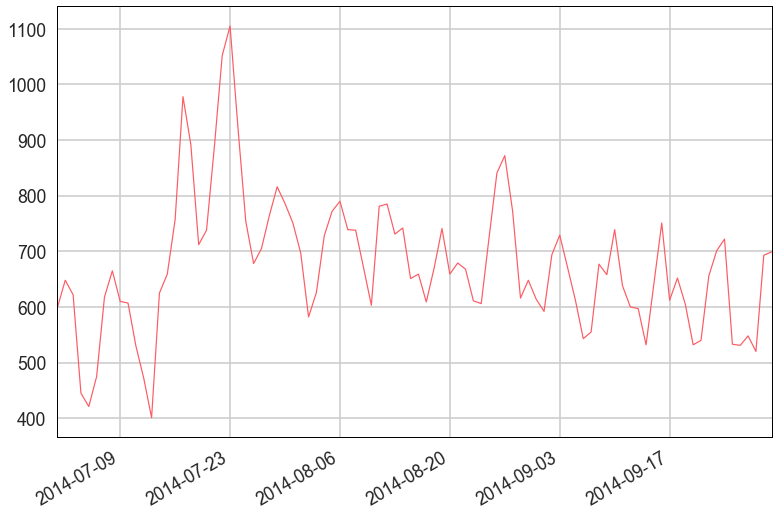

In [43]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
test_users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.show()

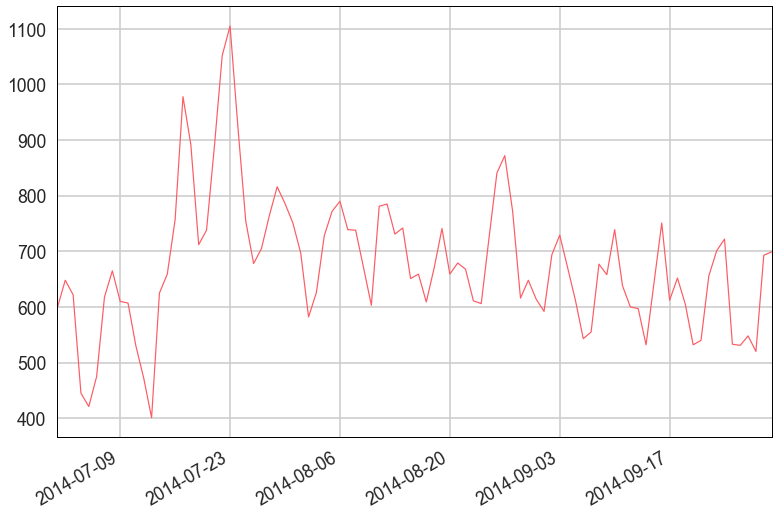

In [44]:
test_users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')
plt.show()

In [45]:
weekdays = []
for date in test_users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

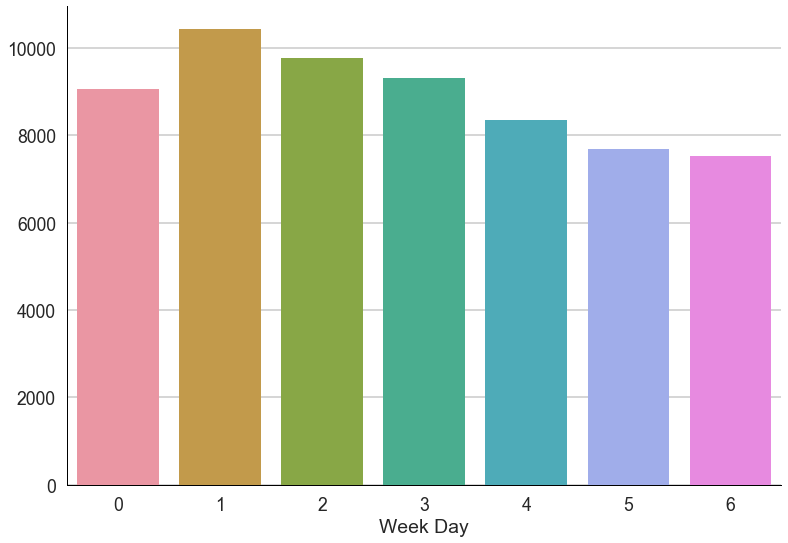

In [46]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()
plt.show()

# This part is on sessions data frame

In [47]:
###The dimensions of the sessions data frame###
print(sessions.shape)
###Data fields captured in sessions data frame##
print(sessions.columns)

(10567737, 6)
Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


In [48]:
###Have a look at the data##
sessions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [49]:
###To set what are the categorical data####
categorical_features_s = [
    'action',
    'action_type',
    'action_detail',
    'device_type'
]

for categorical_feature_s in categorical_features_s:
    sessions[categorical_feature_s] = sessions[categorical_feature_s].astype('category')

In [50]:
###What are the items in each features and the number of categories###

print(sessions.action.unique())

print(sessions.action_type.unique())

print(sessions.action_detail.unique())

print(sessions.device_type.unique())

[lookup, search_results, personalize, index, similar_listings, ..., support_phone_numbers, refund_guest_cancellation, accept_decline, deactivated, rest-of-world]
Length: 360
Categories (359, object): [lookup, search_results, personalize, index, ..., refund_guest_cancellation, accept_decline, deactivated, rest-of-world]
[NaN, click, data, view, submit, ..., -unknown-, booking_request, partner_callback, booking_response, modify]
Length: 11
Categories (10, object): [click, data, view, submit, ..., booking_request, partner_callback, booking_response, modify]
[NaN, view_search_results, wishlist_content_update, similar_listings, change_trip_characteristics, ..., view_identity_verifications, view_ghosting_reasons, view_ghostings, host_standard_suspension, deactivate_user_account]
Length: 156
Categories (155, object): [view_search_results, wishlist_content_update, similar_listings, change_trip_characteristics, ..., view_ghosting_reasons, view_ghostings, host_standard_suspension, deactivate_use

## Data visualisation

### Action

show                     26.195561
index                     7.983724
search_results            6.862642
personalize               6.688509
search                    5.072581
ajax_refresh_subtotal     4.615406
update                    3.455139
similar_listings          3.450351
social_connections        3.207877
reviews                   3.033677
active                    1.779340
similar_listings_v2       1.597201
lookup                    1.533356
create                    1.475122
dashboard                 1.447349
header_userpic            1.342104
collections               1.177329
edit                      1.032227
campaigns                 0.993855
track_page_view           0.767591
NaN                       0.753482
unavailabilities          0.741095
qt2                       0.611777
notifications             0.562012
confirm_email             0.555710
requested                 0.539699
identity                  0.507497
Name: action, dtype: float64


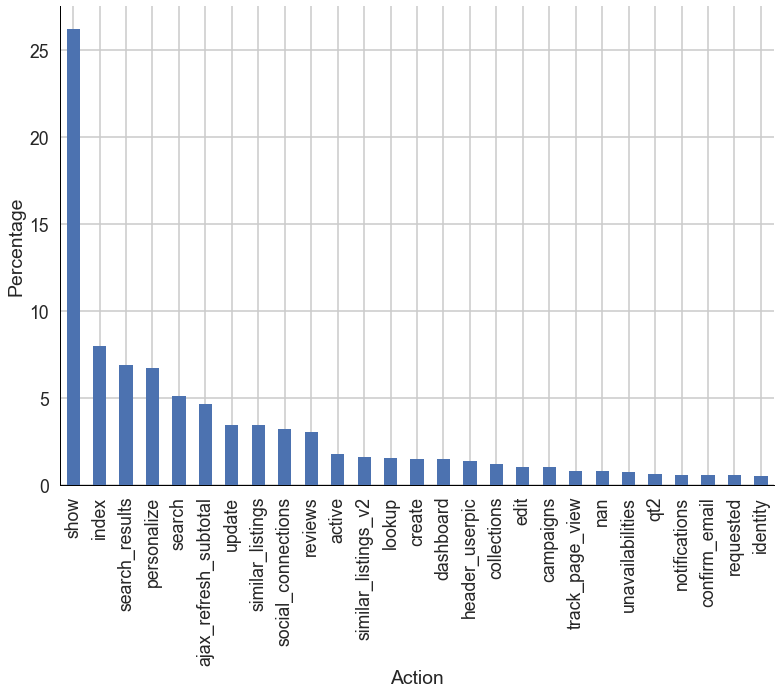

In [51]:
action_percentage=sessions.action.value_counts(dropna=False)/sessions.shape[0]*100

action_percentage_g1=action_percentage[action_percentage>0.5]
print(action_percentage_g1)

action_percentage_g1.plot(kind='bar')
plt.xlabel('Action')
plt.ylabel('Percentage')
sns.despine()
plt.show()

### Action Type

view                33.695975
data                19.907479
click               18.889408
NaN                 10.657003
-unknown-            9.757718
submit               5.898680
message_post         0.824235
partner_callback     0.181042
booking_request      0.177644
modify               0.010778
booking_response     0.000038
Name: action_type, dtype: float64


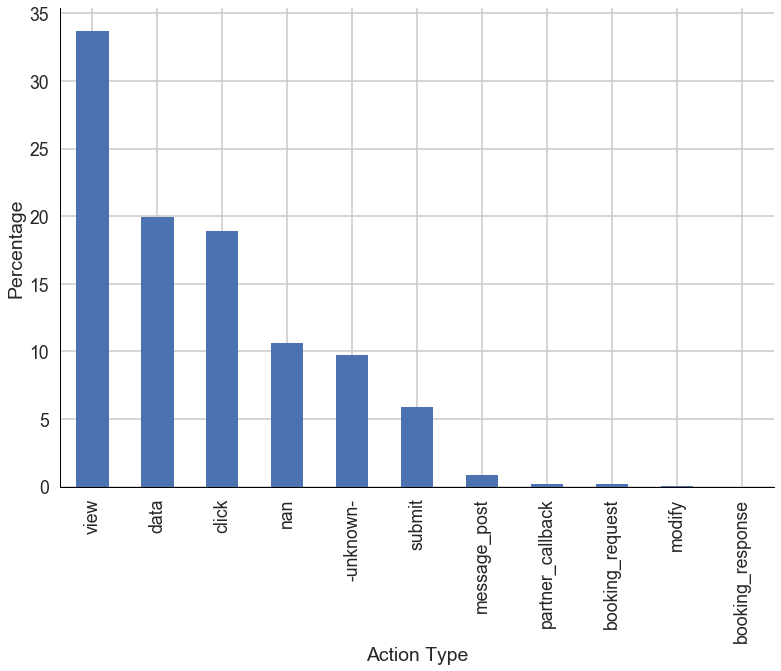

In [52]:
action_type_percentage=sessions.action_type.value_counts(dropna=False)/sessions.shape[0]*100
print(action_type_percentage)

action_type_percentage.plot(kind='bar')
plt.xlabel('Action Type')
plt.ylabel('Percentage')
sns.despine()
plt.show()

### Action details

view_search_results            16.814243
p3                             13.025968
NaN                            10.657003
-unknown-                       9.757444
wishlist_content_update         6.688509
user_profile                    6.215512
change_trip_characteristics     4.615406
similar_listings                3.450351
user_social_connections         3.187049
update_listing                  2.552855
listing_reviews                 2.545682
dashboard                       1.447349
user_wishlists                  1.444699
header_userpic                  1.342104
message_thread                  1.252823
edit_profile                    1.028470
message_post                    0.824235
contact_host                    0.766872
unavailable_dates               0.736156
confirm_email_link              0.552834
create_user                     0.519298
change_contact_host_dates       0.496956
user_profile_content_update     0.477245
user_reviews                    0.469968
p5              

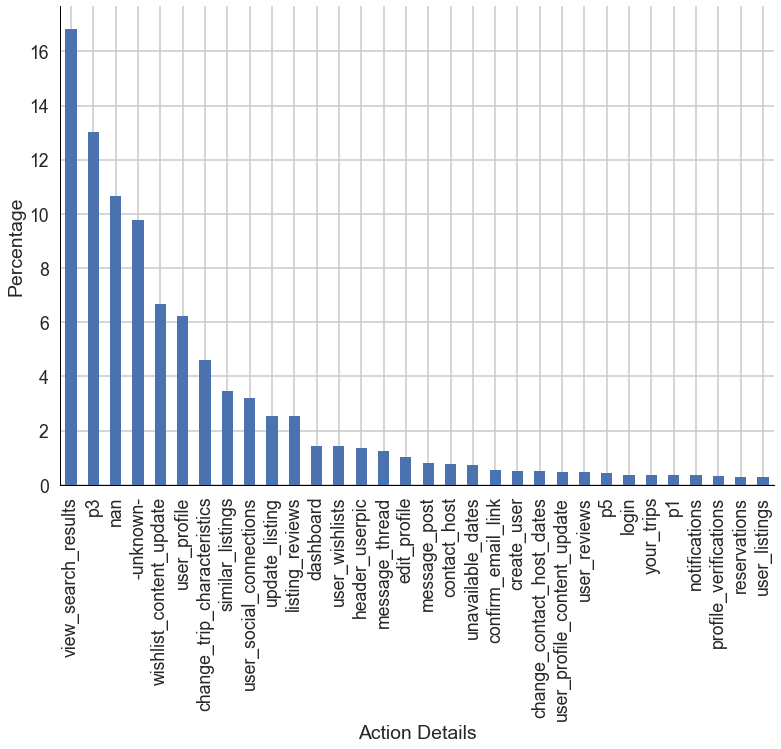

In [53]:
action_detail_percentage=sessions.action_detail.value_counts(dropna=False)/sessions.shape[0]*100
action_detail_percentage_g1=action_detail_percentage[action_detail_percentage>0.3]
print(action_detail_percentage_g1)

action_detail_percentage_g1.plot(kind='bar')
plt.xlabel('Action Details')
plt.ylabel('Percentage')
sns.despine()
plt.show()

### Device type

Mac Desktop                         34.011880
Windows Desktop                     25.157127
iPhone                              19.919411
Android Phone                        7.945287
iPad Tablet                          6.466985
Android App Unknown Phone/Tablet     2.589504
-unknown-                            1.999283
Tablet                               1.323708
Linux Desktop                        0.268487
Chromebook                           0.211474
iPodtouch                            0.077576
Windows Phone                        0.019370
Blackberry                           0.009264
Opera Phone                          0.000643
Name: device_type, dtype: float64


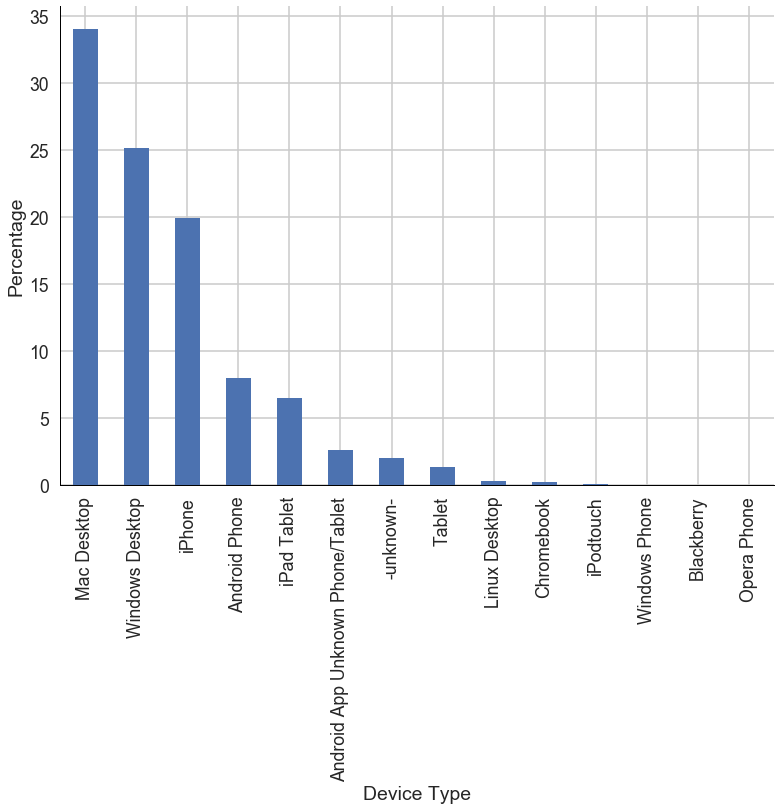

In [54]:
device_type_percentage=sessions.device_type.value_counts(dropna=False)/sessions.shape[0]*100

print(device_type_percentage)

device_type_percentage.plot(kind='bar')
plt.xlabel('Device Type')
plt.ylabel('Percentage')
sns.despine()
plt.show()

### Sum up time elasped for each user

In [55]:
Total_time_elapsed_each_user=sessions.groupby('user_id')['secs_elapsed'].sum()
Total_time_elapsed_each_user = Total_time_elapsed_each_user.to_frame()
Total_time_elapsed_each_user = Total_time_elapsed_each_user.reset_index(level=['user_id',"secs_elapsed"])
print(Total_time_elapsed_each_user)


           user_id  secs_elapsed
0       00023iyk9l      867896.0
1       0010k6l0om      586543.0
2       001wyh0pz8      282965.0
3       0028jgx1x1      297010.0
4       002qnbzfs5     6487080.0
5       0031awlkjq       39574.0
6       0035hobuyj     5724670.0
7       00378ocvlh     1827164.0
8       00389675gq     2605711.0
9       003iamz20l     1590236.0
10      0048rkdgb1      329852.0
11      0057snrdpu     1323458.0
12      005jc3nbmb     2793945.0
13      005v5uf4dh      177779.0
14      0063bawn05     2978016.0
15      006ml14zc1      204263.0
16      006mls2sjw     2424268.0
17      006t3vhawl      815416.0
18      006z8b0uws      324222.0
19      0075z9e9xv     3586976.0
20      007gj7kqdk      370406.0
21      009a40t3dk     2079299.0
22      00a8dbifj8      496196.0
23      00allnceb8           NaN
24      00an0o6c07      462755.0
25      00b9hfwaak      889009.0
26      00bn6hu437      913400.0
27      00bowi9sn3       75568.0
28      00bqkh0g5i         874.0
29      00

#divide the users into host and sign up. NRF for host

# Plot the distribution of total time elapsed

C:\Users\Keira\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


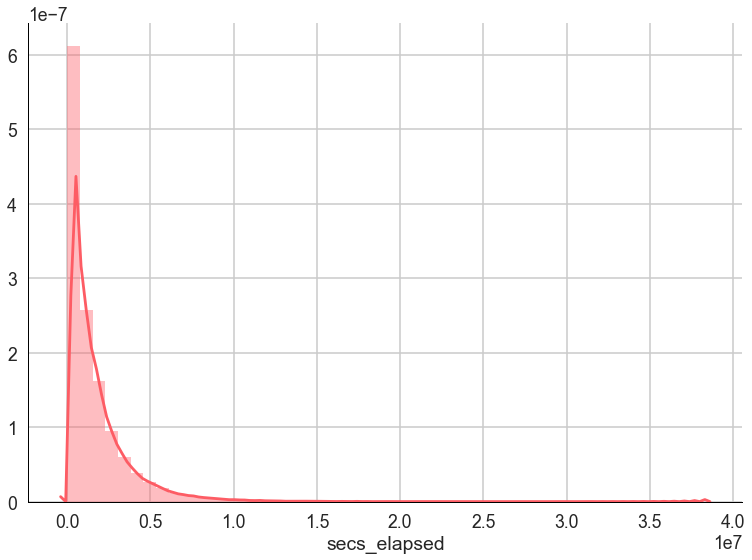

In [56]:
sns.distplot(Total_time_elapsed_each_user.secs_elapsed.dropna(), color='#FD5C64')
plt.xlabel('secs_elapsed')
sns.despine()
plt.show()

#####Most lies within 1 000 000 to 5 000 000 secs (about 11.5days to 58 days)

# The part is on exploratory for countries data frame

In [57]:
###The dimensions of the countries data frame###
print(countries.shape)
###Data fields captured in countries data frame##
print(countries.columns)

(10, 7)
Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')


In [58]:
###Have a look at the data##
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


# To use the age mean and std deviation to try to populate the training and test data frame NA gender values

In [59]:
########Random put age based on training and test set values##
# get average, std, and number of NaN values in airbnb_df
average_age_airbnb   = train_users_2["age"].mean()
std_age_airbnb       = train_users_2["age"].std()
count_nan_age_airbnb = train_users_2["age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_users["age"].mean()
std_age_test       = test_users["age"].std()
count_nan_age_test = test_users["age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_airbnb - std_age_airbnb, average_age_airbnb + std_age_airbnb, size = count_nan_age_airbnb)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# fill NaN values in Age column with random values generated
train_users_2["age"][np.isnan(train_users_2["age"])] = rand_1
test_users["age"][np.isnan(test_users["age"])]     = rand_2

# convert type to integer
train_users_2['age'] = train_users_2['age'].astype(int)
test_users['age']   = test_users['age'].astype(int)

train_users_2.head(20)
#test_users.head(20)

C:\Users\Keira\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Keira\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,FEMALE,47,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,MALE,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,MALE,39,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,MALE,46,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010-01-04


In [60]:
print(average_age_airbnb)

37.443857310354794


In [61]:
print(std_age_airbnb)

13.930721486560786


# Merge training data with  sessions

In [62]:
###Merge training data with countries data
#train_users_2_w_c=pd.merge(train_users_2,countries, on='country_destination')
train_users_2.rename(columns={'id': 'user_id'}, inplace=True)
train_users_2.head(20)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,20090319043255,NaT,FEMALE,47,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,20090523174809,NaT,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,MALE,41,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,MALE,39,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,2010-01-01
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-02
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US,2010-01-03
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,2010-01-04
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,MALE,46,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US,2010-01-04


In [63]:
###Merge training and countries data with sessions data
train_users_2_w_c_s=pd.merge(train_users_2,Total_time_elapsed_each_user, on='user_id')

train_users_2_w_c_s.head(20)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active,secs_elapsed
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Chrome,other,2014-01-01,3427529.0
1,yo8nz8bqcq,2014-01-01,20140101001558,NaT,FEMALE,42,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF,2014-01-01,207842.0
2,4grx6yxeby,2014-01-01,20140101001639,NaT,MALE,29,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Firefox,NDF,2014-01-01,1135444.0
3,ncf87guaf0,2014-01-01,20140101002146,NaT,MALE,34,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF,2014-01-01,3755100.0
4,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,FEMALE,42,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,GB,2014-01-01,2555.0
5,c8mfesvkv0,2014-01-01,20140101002626,NaT,MALE,35,basic,0,en,direct,direct,linked,Web,iPad,Mobile Safari,NDF,2014-01-01,1380288.0
6,xwxei6hdk4,2014-01-01,20140101002742,2014-01-07,FEMALE,32,facebook,0,en,seo,google,linked,Web,iPad,Mobile Safari,US,2014-01-01,49673.0
7,5f45ro5uzk,2014-01-01,20140101003535,NaT,MALE,25,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,NDF,2014-01-01,605413.0
8,ro2stddszp,2014-01-01,20140101005503,2014-12-04,MALE,19,basic,0,en,sem-brand,google,untracked,Web,Mac Desktop,Safari,other,2014-01-01,1284401.0
9,qtw88d9pbl,2014-01-01,20140101005837,NaT,MALE,25,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2014-01-01,2868205.0


# Merge test data with sessions

In [64]:
###Merge training and countries data with sessions data
test_users.rename(columns={'id': 'user_id'}, inplace=True)
test_users.head(20)


,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_first_active
0,5uwns89zht,2014-07-01,20140701000006,NaT,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014-07-01
1,jtl0dijy2j,2014-07-01,20140701000051,NaT,FEMALE,42,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014-07-01
2,xx0ulgorjt,2014-07-01,20140701000148,NaT,FEMALE,30,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014-07-01
3,6c6puo6ix0,2014-07-01,20140701000215,NaT,FEMALE,41,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2014-07-01
4,czqhjk3yfe,2014-07-01,20140701000305,NaT,FEMALE,27,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2014-07-01
5,szx28ujmhf,2014-07-01,20140701000336,NaT,FEMALE,28,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,2014-07-01
6,guenkfjcbq,2014-07-01,20140701000514,NaT,MALE,48,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,2014-07-01
7,tkpq0mlugk,2014-07-01,20140701000649,NaT,FEMALE,43,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2014-07-01
8,3xtgd5p9dn,2014-07-01,20140701000837,NaT,MALE,31,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2014-07-01
9,md9aj22l5a,2014-07-01,20140701002245,NaT,FEMALE,34,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox,2014-07-01


In [65]:
test_users_w_c_s=pd.merge(test_users,Total_time_elapsed_each_user, how='left', on='user_id')
test_users_w_c_s.head(20)

,user_id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_first_active,secs_elapsed
0,5uwns89zht,2014-07-01,20140701000006,NaT,FEMALE,35,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014-07-01,119187.0
1,jtl0dijy2j,2014-07-01,20140701000051,NaT,FEMALE,42,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014-07-01,250119.0
2,xx0ulgorjt,2014-07-01,20140701000148,NaT,FEMALE,30,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014-07-01,975575.0
3,6c6puo6ix0,2014-07-01,20140701000215,NaT,FEMALE,41,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2014-07-01,123001.0
4,czqhjk3yfe,2014-07-01,20140701000305,NaT,FEMALE,27,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2014-07-01,454023.0
5,szx28ujmhf,2014-07-01,20140701000336,NaT,FEMALE,28,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,2014-07-01,60924.0
6,guenkfjcbq,2014-07-01,20140701000514,NaT,MALE,48,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,2014-07-01,640922.0
7,tkpq0mlugk,2014-07-01,20140701000649,NaT,FEMALE,43,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2014-07-01,391231.0
8,3xtgd5p9dn,2014-07-01,20140701000837,NaT,MALE,31,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2014-07-01,8481847.0
9,md9aj22l5a,2014-07-01,20140701002245,NaT,FEMALE,34,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox,2014-07-01,5084265.0


In [66]:
train_users_2_w_c_s.drop('date_account_created', axis=1, inplace = True)
train_users_2_w_c_s.drop('date_first_booking', axis=1, inplace = True)
train_users_2_w_c_s.drop('date_first_active', axis=1, inplace = True)
train_users_2_w_c_s.drop('timestamp_first_active', axis=1, inplace = True)

In [67]:
print(train_users_2_w_c_s)


          user_id  gender  age signup_method  signup_flow language  \
0      d1mm9tcy42    MALE   62         basic            0       en   
1      yo8nz8bqcq  FEMALE   42         basic            0       en   
2      4grx6yxeby    MALE   29         basic            0       en   
3      ncf87guaf0    MALE   34         basic            0       en   
4      4rvqpxoh3h  FEMALE   42         basic           25       en   
5      c8mfesvkv0    MALE   35         basic            0       en   
6      xwxei6hdk4  FEMALE   32      facebook            0       en   
7      5f45ro5uzk    MALE   25         basic            0       en   
8      ro2stddszp    MALE   19         basic            0       en   
9      qtw88d9pbl    MALE   25         basic            0       en   
10     awiurksqr3  FEMALE   32      facebook            0       en   
11     ucgks2fyez    MALE   76         basic            0       en   
12     j30uqo74v6    MALE   42         basic            0       en   
13     cuxu2kbaep   

In [68]:
test_users_w_c_s.drop('date_account_created', axis=1, inplace = True)
test_users_w_c_s.drop('date_first_booking', axis=1, inplace = True)
test_users_w_c_s.drop('date_first_active', axis=1, inplace = True)
test_users_w_c_s.drop('timestamp_first_active', axis=1, inplace = True)

In [69]:
print(test_users_w_c_s)

          user_id  gender  age signup_method  signup_flow language  \
0      5uwns89zht  FEMALE   35      facebook            0       en   
1      jtl0dijy2j  FEMALE   42         basic            0       en   
2      xx0ulgorjt  FEMALE   30         basic            0       en   
3      6c6puo6ix0  FEMALE   41         basic            0       en   
4      czqhjk3yfe  FEMALE   27         basic            0       en   
5      szx28ujmhf  FEMALE   28         basic            0       en   
6      guenkfjcbq    MALE   48         basic           25       en   
7      tkpq0mlugk  FEMALE   43         basic            0       en   
8      3xtgd5p9dn    MALE   31         basic            0       en   
9      md9aj22l5a  FEMALE   34         basic            0       en   
10     gg3eswjxdf    MALE   26         basic            0       en   
11     fyomoivygn  FEMALE   30         basic           25       en   
12     iq4kkd5oan    MALE   24      facebook            0       en   
13     6k1xls6x5j   

In [70]:
train_users_2_w_c_s['Age_Over40'] = (train_users_2_w_c_s.age >39).map({True:1,False:0})
train_users_2_w_c_s['Age_31-39'] = ((train_users_2_w_c_s.age<40) & (train_users_2_w_c_s.age>30)).map({True:1,False:0})
train_users_2_w_c_s['Age_Under31'] = (train_users_2_w_c_s.age <31).map({True:1,False:0})

In [71]:
train_users_2_w_c_s['secs_elapsed_Over58'] = (train_users_2_w_c_s.secs_elapsed >5000000).map({True:1,False:0})
train_users_2_w_c_s['secs_elapsed_11-58'] = ((train_users_2_w_c_s.secs_elapsed<5000000) & (train_users_2_w_c_s.secs_elapsed>1000000)).map({True:1,False:0})
train_users_2_w_c_s['secs_elapsed_under11'] = (train_users_2_w_c_s.secs_elapsed <1000000).map({True:1,False:0})

In [72]:
train_users_2_w_c_s.drop('age', axis=1, inplace = True)
train_users_2_w_c_s.drop('user_id', axis=1, inplace = True)
train_users_2_w_c_s.drop('secs_elapsed', axis=1, inplace = True)

In [73]:
test_users_w_c_s['Age_Over40'] = (test_users_w_c_s.age >39).map({True:1,False:0})
test_users_w_c_s['Age_31-39'] = ((test_users_w_c_s.age<40) & (test_users_w_c_s.age>30)).map({True:1,False:0})
test_users_w_c_s['Age_Under31'] = (test_users_w_c_s.age <31).map({True:1,False:0})

In [74]:
test_users_w_c_s['secs_elapsed_Over58'] = (test_users_w_c_s.secs_elapsed >5000000).map({True:1,False:0})
test_users_w_c_s['secs_elapsed_11-58'] = ((test_users_w_c_s.secs_elapsed<5000000) & (test_users_w_c_s.secs_elapsed>1000000)).map({True:1,False:0})
test_users_w_c_s['secs_elapsed_under11'] = (test_users_w_c_s.secs_elapsed <1000000).map({True:1,False:0})

In [75]:
test_users_w_c_s.drop('age', axis=1, inplace = True)
test_users_w_c_s.drop('user_id', axis=1, inplace = True)
test_users_w_c_s.drop('secs_elapsed', axis=1, inplace = True)

In [76]:
print(test_users_w_c_s)

       gender signup_method  signup_flow language affiliate_channel  \
0      FEMALE      facebook            0       en            direct   
1      FEMALE         basic            0       en            direct   
2      FEMALE         basic            0       en            direct   
3      FEMALE         basic            0       en            direct   
4      FEMALE         basic            0       en            direct   
5      FEMALE         basic            0       en         sem-brand   
6        MALE         basic           25       en            direct   
7      FEMALE         basic            0       en            direct   
8        MALE         basic            0       en            direct   
9      FEMALE         basic            0       en     sem-non-brand   
10       MALE         basic            0       en            direct   
11     FEMALE         basic           25       en            direct   
12       MALE      facebook            0       en            direct   
13    

# Random Forest

In [77]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [79]:
def predict(model, ClassificationAlg,testX,testY):
    print("\n\n"+ClassificationAlg)
    PredictedY = model.predict(testX)
    print(classification_report(testY, PredictedY))
    print('Confusion Matrix\n')
    print(confusion_matrix(testY, PredictedY))
    print("\nThe accuracy score is {:.2%}".format(accuracy_score(testY, PredictedY)))



def Random_Forest(trainX,testX,trainY,testY):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(max_depth=4, random_state=51)
    rf.fit(trainX, trainY)
    predict(rf,"Random Forest",testX, testY)


In [80]:
#######Remove label from training data set#################
y_train = train_users_2_w_c_s['country_destination']
x_train = train_users_2_w_c_s.drop('country_destination', axis=1)

In [81]:
#encode the data
le = preprocessing.LabelEncoder()
for categorical_feature in x_train.columns.values:
    x_train[categorical_feature] = x_train[categorical_feature].factorize()[0]
    x_train[categorical_feature] = le.fit_transform(x_train[categorical_feature])

Feature ranking:
1. feature 9 (0.163029)
2. feature 6 (0.154749)
3. feature 8 (0.127982)
4. feature 4 (0.099650)
5. feature 3 (0.088078)
6. feature 0 (0.062996)
7. feature 5 (0.059988)
8. feature 7 (0.053029)
9. feature 15 (0.042939)
10. feature 2 (0.037479)
11. feature 1 (0.036350)
12. feature 14 (0.024909)
13. feature 13 (0.016825)
14. feature 10 (0.012530)
15. feature 12 (0.010783)
16. feature 11 (0.008682)


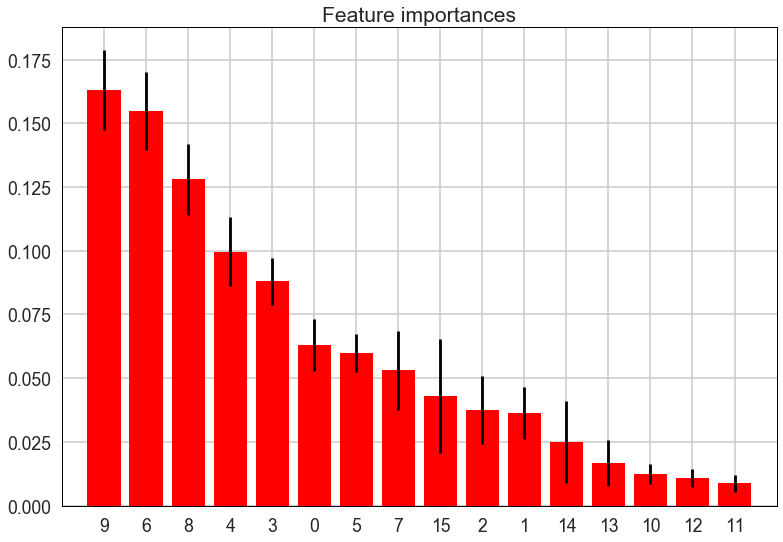

In [82]:
# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=16,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [83]:
###Drop unimportant features
x_train.drop('Age_Over40', axis=1, inplace = True)
x_train.drop('Age_31-39', axis=1, inplace = True)
x_train.drop('Age_Under31', axis=1, inplace = True)
x_train.drop('secs_elapsed_Over58', axis=1, inplace = True)
x_train.drop('secs_elapsed_11-58', axis=1, inplace = True)
x_train.drop('secs_elapsed_under11', axis=1, inplace = True)
x_train.drop('signup_method', axis=1, inplace = True)
x_train.drop('signup_flow', axis=1, inplace = True)
#x_train.drop('signup_app', axis=1, inplace = True)
print(x_train)

       gender  language  affiliate_channel  affiliate_provider  \
0           0         0                  0                   0   
1           1         0                  1                   1   
2           0         0                  2                   0   
3           0         0                  1                   1   
4           1         0                  1                   1   
5           0         0                  1                   1   
6           1         0                  3                   0   
7           0         0                  1                   1   
8           0         0                  2                   0   
9           0         0                  1                   1   
10          1         0                  1                   1   
11          0         0                  3                   2   
12          0         0                  1                   1   
13          0         0                  1                   1   
14        

In [84]:
#split into training and validation set###
trainX,testX,trainY,testY = train_test_split(x_train,y_train,test_size=.20, random_state=5)

In [85]:
Random_Forest(trainX,testX,trainY,testY)




Random Forest


C:\Users\Keira\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

         AU       0.00      0.00      0.00        26
         CA       0.00      0.00      0.00       104
         DE       0.00      0.00      0.00        49
         ES       0.00      0.00      0.00       145
         FR       0.00      0.00      0.00       280
         GB       0.00      0.00      0.00       160
         IT       0.00      0.00      0.00       222
        NDF       0.61      1.00      0.76      8997
         NL       0.00      0.00      0.00        47
         PT       0.00      0.00      0.00        13
         US       0.00      0.00      0.00      4011
      other       0.00      0.00      0.00       709

avg / total       0.37      0.61      0.46     14763

Confusion Matrix

[[   0    0    0    0    0    0    0   26    0    0    0    0]
 [   0    0    0    0    0    0    0  104    0    0    0    0]
 [   0    0    0    0    0    0    0   49    0    0    0    0]
 [   0    0    0    0    0    0    0  145    0  

In [86]:
# encode the data
le = preprocessing.LabelEncoder()
for categorical_feature in test_users_w_c_s.columns.values:
    test_users_w_c_s[categorical_feature] = test_users_w_c_s[categorical_feature].factorize()[0]
    test_users_w_c_s[categorical_feature] = le.fit_transform(test_users_w_c_s[categorical_feature])

In [87]:
###Drop unimportant features
test_users_w_c_s.drop('Age_Over40', axis=1, inplace = True)
test_users_w_c_s.drop('Age_31-39', axis=1, inplace = True)
test_users_w_c_s.drop('Age_Under31', axis=1, inplace = True)
test_users_w_c_s.drop('secs_elapsed_Over58', axis=1, inplace = True)
test_users_w_c_s.drop('secs_elapsed_11-58', axis=1, inplace = True)
test_users_w_c_s.drop('secs_elapsed_under11', axis=1, inplace = True)
test_users_w_c_s.drop('signup_method', axis=1, inplace = True)
test_users_w_c_s.drop('signup_flow', axis=1, inplace = True)
#test_users_w_c_s.drop('signup_app', axis=1, inplace = True)

In [88]:
print(test_users_w_c_s)

       gender  language  affiliate_channel  affiliate_provider  \
0           0         0                  0                   0   
1           0         0                  0                   0   
2           0         0                  0                   0   
3           0         0                  0                   0   
4           0         0                  0                   0   
5           0         0                  1                   1   
6           1         0                  0                   0   
7           0         0                  0                   0   
8           1         0                  0                   0   
9           0         0                  2                   1   
10          1         0                  0                   0   
11          0         0                  0                   0   
12          1         0                  0                   0   
13          1         0                  0                   0   
14        

In [124]:
parameters_rf = {
    'n_estimators': [1,3,5],
    'max_features': ['auto', 'log2'],
    'max_depth': [1,2,3],
    "min_samples_split": [15, 20],
    "min_samples_leaf": [5, 10, 20],
    "max_leaf_nodes": [20, 40],
    "min_weight_fraction_leaf": [0.1],
    'random_state': [50]
}

In [125]:
##########With CV##################################
rf = GridSearchCV(RandomForestClassifier(), parameters_rf,cv=3,  verbose=100)
rf.fit(x_train, y_train)
PredictedY = rf.predict_proba(test_users_w_c_s)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50, score=0.610052, total=   0.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50, score=0.610201, total=   0.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_lea

In [126]:
rf.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 1,
 'random_state': 50}

In [127]:
############Without CV##############

#rf = RandomForestClassifier(max_depth=4, random_state=51)
#rf.fit(x_train, y_train)
#PredictedY = rf.predict_proba(test_users_w_c_s)

#H=pd.DataFrame(rf.predict_proba(test_users_w_c_s), columns=rf.classes_)
#print(H)

In [128]:
id_test = test_users['user_id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(PredictedY[i])[::-1][:5].tolist()


In [129]:
#print(rf.classes_)

In [130]:
# Generating a csv file with the predictions 
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('output_randomForest.csv',index=False)
# Any results you write to the current directory are saved as output.

# Gradient Boosting

In [131]:
from sklearn.ensemble import GradientBoostingClassifier


In [132]:
parameters_clf = {
    'n_estimators': [25,50],
    'max_features': ['auto', 'log2'],
    'max_depth': [1,2,3],
    'random_state': [50]
}

In [133]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters_clf, cv=3, verbose=100)


In [134]:
clf.fit(x_train, y_train)
Pred_Y = clf.predict_proba(test_users_w_c_s)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=1, max_features=auto, n_estimators=25, random_state=50 
[CV]  max_depth=1, max_features=auto, n_estimators=25, random_state=50, score=0.610052, total=  28.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.9s remaining:    0.0s
[CV] max_depth=1, max_features=auto, n_estimators=25, random_state=50 
[CV]  max_depth=1, max_features=auto, n_estimators=25, random_state=50, score=0.610201, total=  24.3s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.0s remaining:    0.0s
[CV] max_depth=1, max_features=auto, n_estimators=25, random_state=50 
[CV]  max_depth=1, max_features=auto, n_estimators=25, random_state=50, score=0.610309, total=  31.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s
[CV] max_depth=1, max_features=auto, n_estimators=50, random_state=50 
[CV]  max_depth=1, max_features=auto, n_estimators=50, random_state=50, score=0.610052, total=  50.8s
[Parall

In [135]:
clf.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'n_estimators': 25,
 'random_state': 50}

In [136]:
id_test = test_users['user_id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(Pred_Y[i])[::-1][:5].tolist()


In [137]:
# Generating a csv file with the predictions 
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('output_gradient_boosting.csv',index=False)
# Any results you write to the current directory are saved as output.

# Adaboost

In [138]:
from sklearn.ensemble import AdaBoostClassifier


In [139]:
parameters_AdaB = {
    'n_estimators': [10,20],
    'learning_rate': [0.01,0.03,0.05],
    'algorithm': ['SAMME','SAMME.R'],
    'random_state': [50]
}

In [140]:
Af = GridSearchCV(AdaBoostClassifier(), parameters_AdaB,cv=3, verbose=100)


In [141]:
Af.fit(x_train, y_train)
Pred_Y_Af = Af.predict_proba(test_users_w_c_s)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50 
[CV]  algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50, score=0.610052, total=   4.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50 
[CV]  algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50, score=0.610201, total=   3.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50 
[CV]  algorithm=SAMME, learning_rate=0.01, n_estimators=10, random_state=50, score=0.610309, total=   3.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.9s remaining:    0.0s
[CV] algorithm=SAMME, learning_rate=0.01, n_estimators=20, random_state=50 
[CV]  algorithm=SAMME, learning_rate=0.01, n_estimators=20, random_state=5

In [142]:
Af.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.01,
 'n_estimators': 10,
 'random_state': 50}

In [143]:
id_test = test_users['user_id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(Pred_Y_Af[i])[::-1][:5].tolist()


In [144]:
# Generating a csv file with the predictions 
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('output_Adaboost.csv',index=False)
# Any results you write to the current directory are saved as output.

# XGBoost

In [145]:
from xgboost.sklearn import XGBClassifier

In [146]:
parameters_xgb = {
    'n_estimators': [1,3,5],
    'max_depth': [1,2],
    'learning_rate': [0.01,0.02],
    'random_state': [50],
    'min_child_weight':[4,5,6],
    'gamma':[0,5],
    'reg_alpha':[1e-5, 1e-2, 0.1]
}

In [147]:
xgb = GridSearchCV(XGBClassifier(), parameters_xgb, cv=3, verbose=100)

In [148]:
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict_proba(test_users_w_c_s)  

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05 
[CV]  gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05, score=0.610052, total=   1.3s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05 
[CV]  gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05, score=0.610201, total=   1.2s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s
[CV] gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05 
[CV]  gamma=0, learning_rate=0.01, max_depth=1, min_child_weight=4, n_estimators=1, random_state=50, reg_alpha=1e-05, score=0.6103

In [149]:
xgb.best_params_

{'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 1,
 'min_child_weight': 4,
 'n_estimators': 1,
 'random_state': 50,
 'reg_alpha': 1e-05}

In [150]:
id_test = test_users['user_id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(y_pred_xgb[i])[::-1][:5].tolist()


In [151]:
# Generating a csv file with the predictions 
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('output_Xgboost.csv',index=False)
# Any results you write to the current directory are saved as output.

In [152]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [158]:
# Voting Ensemble for Classification
# create the sub models
#kfold = model_selection.KFold(random_state=50)
estimators = []
estimators.append(('random forest', rf))
estimators.append(('GBM', clf))
estimators.append(('Adaboost', Af))
estimators.append(('XGBoost', xgb))
# create the ensemble model
ensemble = VotingClassifier(estimators, voting='soft')
#results = model_selection.cross_val_score(ensemble, x_train, y_train, cv=3)
#print(results.mean())

In [159]:
ensemble.fit(x_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50, score=0.610052, total=   0.2s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50 
[CV]  max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=15, min_weight_fraction_leaf=0.1, n_estimators=1, random_state=50, score=0.610201, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[CV] max_depth=1, max_features=auto, max_leaf_nodes=20, min_samples_lea

VotingClassifier(estimators=[('random forest', GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
         ...   pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=100))],
         n_jobs=1, voting='soft', weights=None)

In [160]:
y_pred_ensemble = ensemble.predict_proba(test_users_w_c_s)  

In [161]:
id_test = test_users['user_id']
ids = []  #list of ids
cts = []  #list of countries
for i in range(len(id_test)):
    idx = id_test[i]
    ids += [idx] * 5
    cts += np.argsort(y_pred_ensemble[i])[::-1][:5].tolist()


In [162]:
# Generating a csv file with the predictions 
sub = pd.DataFrame(np.column_stack((ids, cts)), columns=['id', 'country'])
sub.to_csv('output_ensemble.csv',index=False)
# Any results you write to the current directory are saved as output.